# EDA usando funciones basicas con Python

A lo largo de este cuaderno, implementaremos la detección de habilidades en un conjunto de datos. Antes de comenzar, mira el video instructivo asociado y responde la pregunta en el video. Todo el código que implementaremos y las instrucciones relacionadas se encuentran en este cuaderno.

## Resumen

En este cuaderno, utilizaremos pandas para examinar los datos de los rayos recopilados por la Administración Nacional Oceánica y Atmosférica (NOAA) en 2018. Luego, calcularemos el número total de rayos por cada mes y representaremos esta información en un gráfico de barras.

## Importar paquetes y bibliotecas

Antes de comenzar, necesitaremos importar todas las bibliotecas y extensiones necesarias. A lo largo del curso, utilizaremos pandas, numpy y datetime para realizar operaciones, y matplotlib, pyplot y seaborn para crear gráficos.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Read in the 2018 lightning strike dataset.
df = pd.read_csv('eda_using_basic_data_functions_in_python_dataset1.csv')

In [3]:
# Inspect the first 10 rows.
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


Ten en cuenta que los datos están estructurados como una fila por día junto con la ubicación geométrica del impacto.  

 Una forma rápida de determinar cuántas filas y columnas de datos hay en total es usar  `df.shape` . La información se mostrará como: ([filas], [columnas]).

In [4]:
df.shape

(3401012, 3)

The total number of rows is 3,401,012, and there are three columns. 

In [5]:
df.tail(10) # ver los ultimos 10 registros

,date,number_of_strikes,center_point_geom
3401002,2018-12-27,30,POINT(-97.6 30.4)
3401003,2018-12-27,30,POINT(-97.5 30.4)
3401004,2018-12-27,30,POINT(-94.5 32.7)
3401005,2018-12-28,30,POINT(-90.4 28.9)
3401006,2018-12-28,30,POINT(-90.2 29.1)
3401007,2018-12-28,30,POINT(-90.6 28.7)
3401008,2018-12-28,30,POINT(-89.4 30.9)
3401009,2018-12-28,30,POINT(-89.5 31.4)
3401010,2018-12-28,30,POINT(-88.3 31.6)
3401011,2018-12-28,30,POINT(-88.4 32.1)


In [6]:
# Get more information about the data, including data types of each column
# obtiene mas informacion sobre la data, incluido el tipo de dato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


### Convierte la columna date en un tipo de dato datetime

`info`  proporcionará el número total de filas (3,401,012) y columnas (3). También mostrará los nombres y tipos de datos de cada columna, así como el tamaño del dataframe en memoria. 


En este caso, observa que la columna  `date`  es de tipo 'object' en lugar de ser de tipo 'date'. Los objetos son cadenas de texto. Cuando las fechas se codifican como cadenas de texto, no se pueden manipular tan fácilmente. Convertir las fechas de cadena de texto a datetime te permitirá trabajar con ellas de manera más sencilla.

amos a convertirlas a datetime utilizando la función  `to_datetime()`  de pandas.

In [7]:
# Convert date column to datetime
df['date']= pd.to_datetime(df['date'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [9]:
df.sample(10)

,date,number_of_strikes,center_point_geom
1599892,2018-09-13,2,POINT(-103.9 23)
1523380,2018-08-01,2,POINT(-96.5 27.4)
1801772,2018-07-08,3,POINT(-83.5 32.8)
2761098,2018-06-17,9,POINT(-109.2 30.5)
314144,2018-08-23,36,POINT(-108.2 31)
2261881,2018-05-13,5,POINT(-96.7 42.4)
2477809,2018-08-11,6,POINT(-86.1 27.7)
1688935,2018-03-25,3,POINT(-75.8 32.6)
1622753,2018-09-30,2,POINT(-77.3 18.6)
749048,2018-06-30,1,POINT(-98.8 33.9)


### Calcula los dias con la mayor cantidad de rayos

Como parte del análisis, deseas tener una idea de los puntos de datos más altos. Para este conjunto de datos, podemos calcular los 10 días de 2018 con la mayor cantidad de rayos utilizando las funciones  `groupby()` ,  `sum()`  y  `sort_values()`  de pandas.

Al usar  `groupby()`  en la columna de fecha, la función combina todas las filas con la misma fecha en una sola fila.  

Luego, al usar  `sum()` , se realiza un cálculo de suma en todas las demás columnas que se pueden sumar. En este caso, estamos sumando todos los rayos que ocurrieron en cada día. Observa que la columna  `center_point_geom`  no se incluye en la salida. Esto se debe a que, al ser un objeto de tipo cadena de texto, esta columna no se puede sumar.

Finalmente,  `sort_values()`  devuelve los resultados en orden descendente de la cantidad total de rayos para cada día en los datos.

In [10]:
# Calculate days with most lightning strikes.
df.groupby(['date']).sum(numeric_only = True) \
    .sort_values('number_of_strikes', ascending=False).head(10) 

,number_of_strikes
date,
2018-08-29,1070457
2018-08-17,969774
2018-08-28,917199
2018-08-27,824589
2018-08-30,802170
2018-08-19,786225
2018-08-18,741180
2018-08-16,734475
2018-08-31,723624


Un error común entre los profesionales de datos es usar  `count()`  en lugar de  `sum()` , y viceversa. En este caso,  `count()`  devolvería el número de ocurrencias de cada fecha en el conjunto de datos, lo cual no es el resultado deseado.

### Extraer el numero del mes

A continuación, extraeremos los datos del mes de la columna  `date`  y agregaremos esos datos de mes extraídos en una nueva columna llamada  `month` .  `dt.month`  extrae solo la información del mes (como un valor numérico) de la fecha. Por eso, convertir la columna  `date`  a datetime es muy útil.

In [11]:
# Create a new `month` column
df['month'] = df['date'].dt.month
df.sample(10)

,date,number_of_strikes,center_point_geom,month
2461217,2018-07-26,6,POINT(-106.8 36),7
395444,2018-10-08,26,POINT(-101.8 34.7),10
3230354,2018-08-21,18,POINT(-88.7 27.4),8
2963784,2018-06-08,12,POINT(-104.8 47.8),6
3148690,2018-12-03,15,POINT(-76.8 32),12
68617,2018-05-19,57,POINT(-102.2 39.5),5
1960685,2018-08-28,3,POINT(-89.8 42.3),8
1473846,2018-07-15,2,POINT(-97.4 50.4),7
377086,2018-09-06,25,POINT(-99.5 26.4),9
2613403,2018-07-17,7,POINT(-72.2 43),7


### Calcular el numeros de rayos por mes

Ahora, ordenaremos nuestros valores por la cantidad de strikes por mes. Utiliza  `groupby()` ,  `sum()`  y  `sort_values()`  de pandas de nuevo.

In [12]:
# Calculate total number of strikes per month
df.groupby(['month']).sum(numeric_only=True)\
    .sort_values('number_of_strikes', ascending=False).head(12)

,number_of_strikes
month,
8,15525255
7,8320400
6,6445083
5,4166726
9,3018336
2,2071315
4,1524339
10,1093962
1,860045


### Convierte el número del mes a texto

Para facilitar la lectura de los datos, convirtamos el número del mes a texto utilizando la función  `dt.month_name()`  de datetime y agreguémoslo como una nueva columna en el dataframe.  `str.slice`  omitirá el texto después de las primeras tres letras.

In [13]:
# Crear una nueva columna `month_txt`.
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


In [28]:
def mes_en_español(numero):
    meses = "enero febrero marzo abril mayo junio julio agosto septiembre octubre noviembre diciembre".title().split()
    return meses[numero - 1]

In [35]:
df['mes_es'] = df['date'].dt.month.apply(mes_en_español)
df.sample(10)

,date,number_of_strikes,center_point_geom,month,month_txt,mes_en,mes_es
1299916,2018-04-25,2,POINT(-98.8 21.6),4,Apr,Abril,Abril
1847524,2018-07-31,3,POINT(-72.1 36.6),7,Jul,Julio,Julio
850253,2018-07-17,1,POINT(-55.2 40.1),7,Jul,Julio,Julio
508596,2018-04-27,1,POINT(-76.7 30.7),4,Apr,Abril,Abril
2093976,2018-05-29,4,POINT(-104.1 43.4),5,May,Mayo,Mayo
2936928,2018-08-07,11,POINT(-82.7 35.3),8,Aug,Agosto,Agosto
546505,2018-05-12,1,POINT(-84 42.4),5,May,Mayo,Mayo
1344961,2018-05-23,2,POINT(-88.4 32.4),5,May,Mayo,Mayo
3265763,2018-11-07,19,POINT(-71.6 37.1),11,Nov,Noviembre,Noviembre
1975374,2018-08-31,3,POINT(-108.7 50.7),8,Aug,Agosto,Agosto


El objetivo es graficar el número total de huelgas por mes como un gráfico de barras. Para ayudar con la graficación, crearemos un nuevo dataframe llamado  `df_por_mes` . Esto nos permitirá acceder fácilmente al mes, el texto del mes y el número total de huelgas para cada mes. 

In [37]:
# Create a new helper dataframe for plotting.
df_by_month = df.groupby(['month','mes_es']).sum(numeric_only=True).sort_values('month', ascending=True).head(12).reset_index()
df_by_month

,month,mes_es,number_of_strikes
0,1,Enero,860045
1,2,Febrero,2071315
2,3,Marzo,854168
3,4,Abril,1524339
4,5,Mayo,4166726
5,6,Junio,6445083
6,7,Julio,8320400
7,8,Agosto,15525255
8,9,Septiembre,3018336
9,10,Octubre,1093962


### Construir un grafico de barras

Ahora, hagamos un gráfico de barras. La función  `plt.bar()`  de Pyplot toma argumentos posicionales de  `x`  y  `height` , que representan los datos utilizados para los ejes x e y, respectivamente. El eje x representará los meses y el eje y representará el conteo de huelgas.

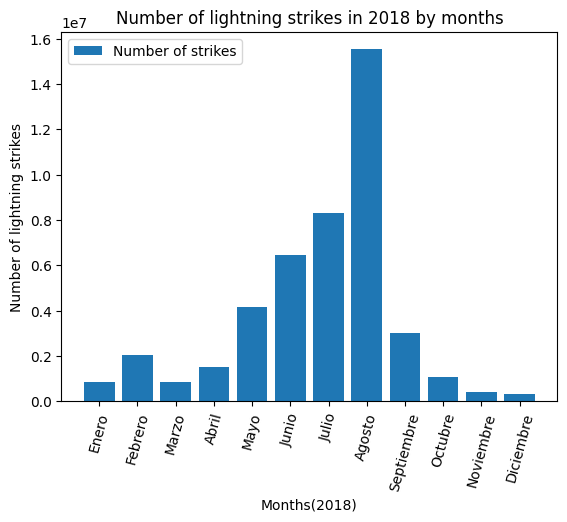

In [48]:
plt.bar(x=df_by_month['mes_es'],height= df_by_month['number_of_strikes'], label="Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.xticks(rotation=75)
plt.legend()
plt.show()